### Basic Regression Project From Scratch 
Algerian Forest Fire Dataset 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 


In [2]:
df=pd.read_csv("Algerian_forest_fires_dataset.csv")

In [3]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
#Division Of Dataset into Two Regions
df.loc[:122,"Region"]=0
df.loc[:122,"Region"]=1
dc=df

In [8]:
dc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       123 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [9]:
dc.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [10]:
#Removing the Null Values
dc=dc.dropna().reset_index(drop=True)

In [11]:
dc.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [12]:
dc.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
dc.iloc[[121]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1.0


In [14]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [16]:

df=df.drop(['day','month','year'],axis=1)

In [17]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [18]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [19]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [20]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [21]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [22]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

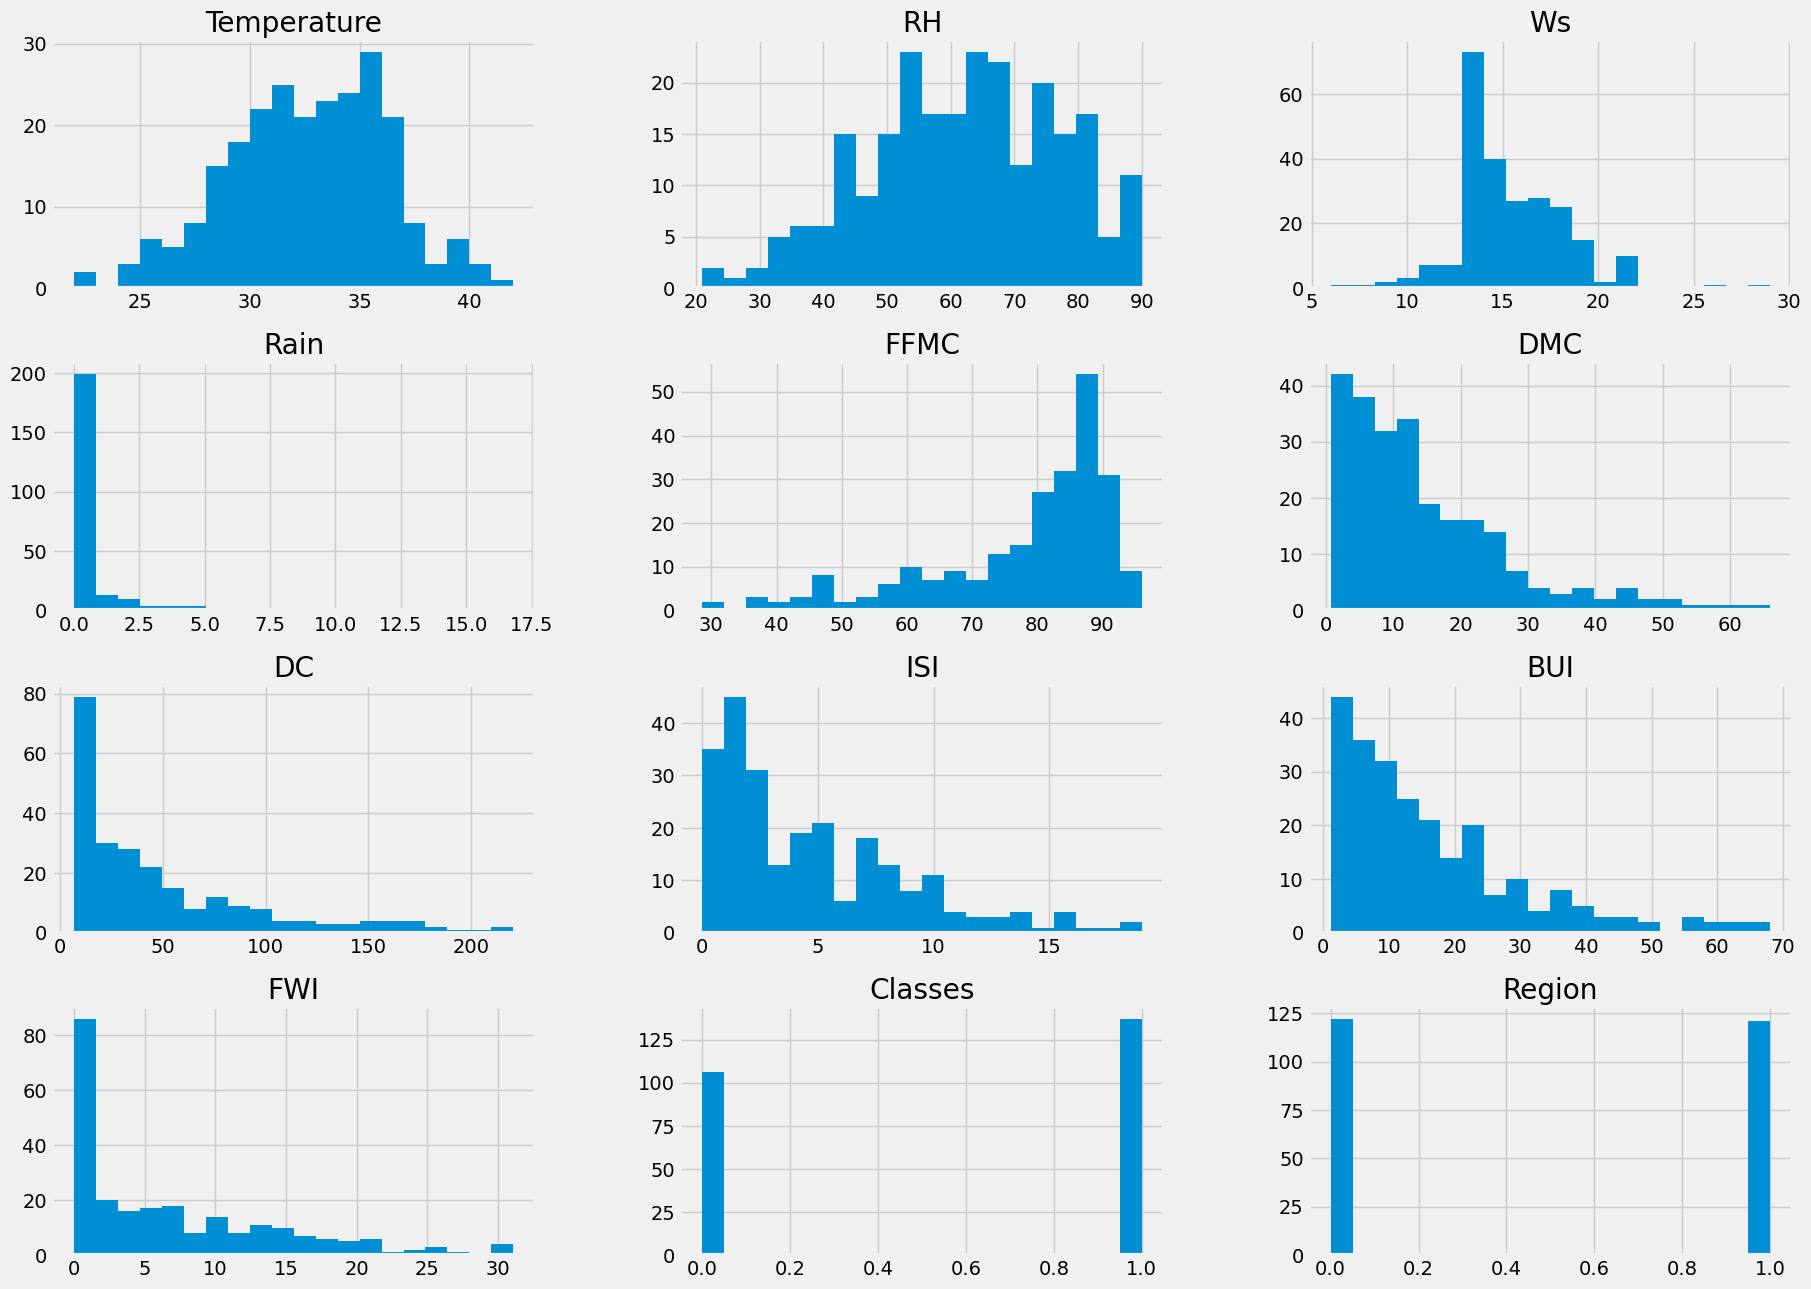

In [23]:
plt.style.use('fivethirtyeight')
df.hist(bins=20,figsize=(20,15))
plt.show()

In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [25]:
#Percentage for Pi Chart 
percentage=df["Classes"].value_counts(normalize=True)*100

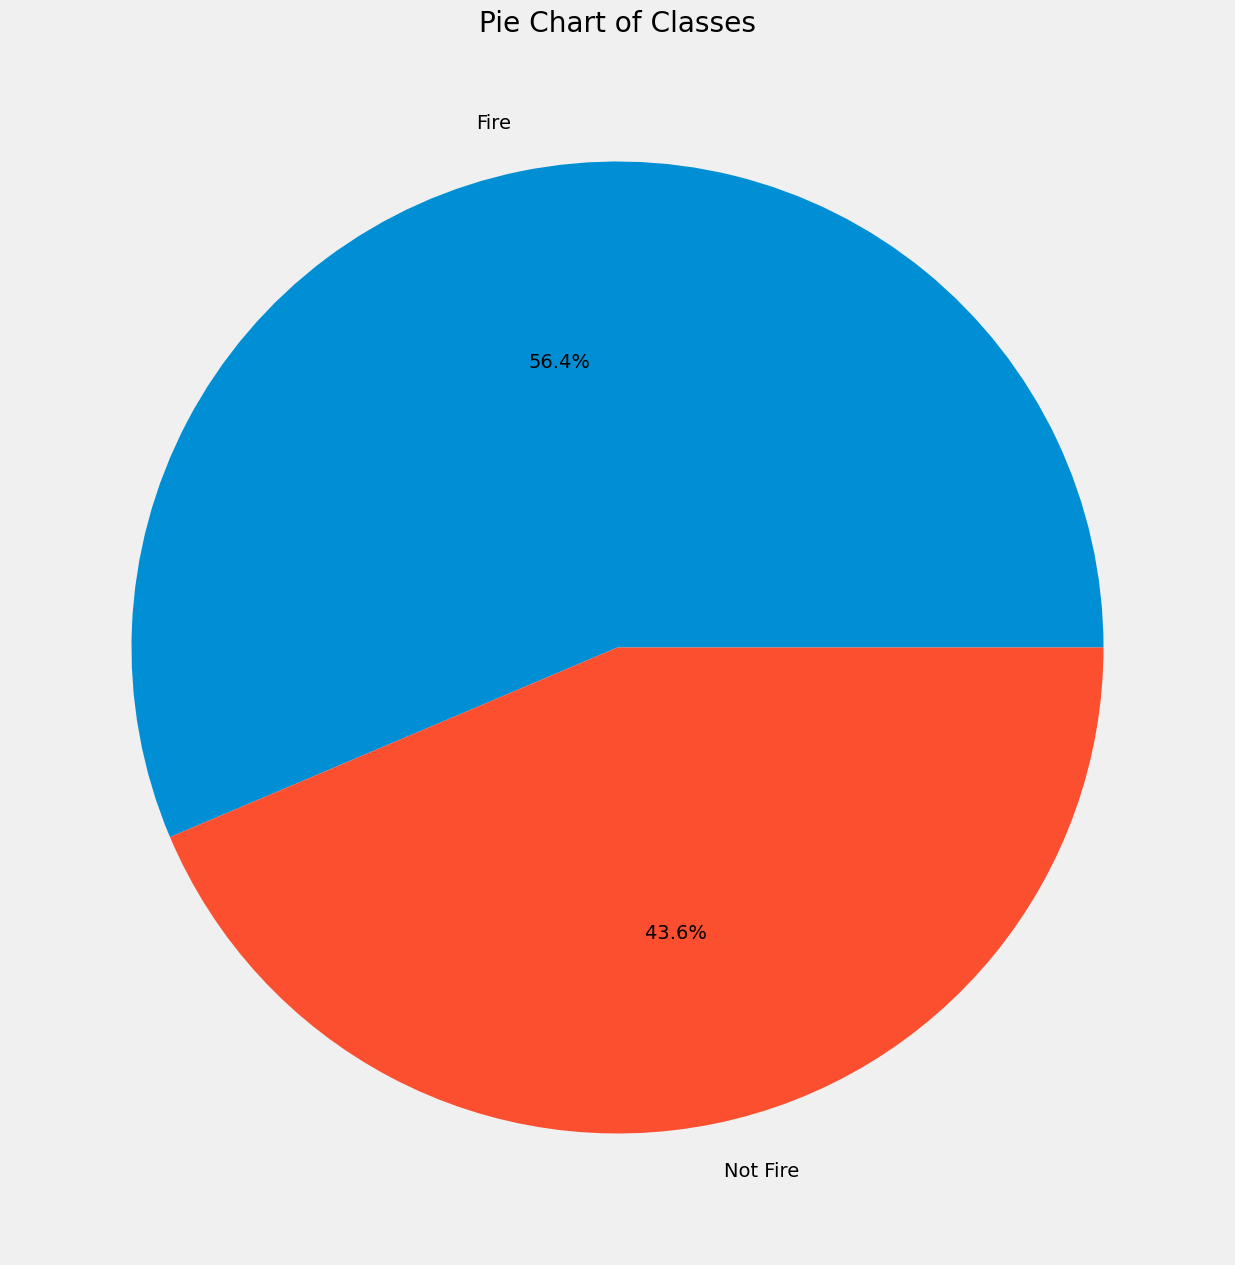

In [26]:
#Plotting pie chart
classLevels=["Fire","Not Fire"]
plt.figure(figsize=(20,15))
plt.pie(percentage,labels=classLevels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [27]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

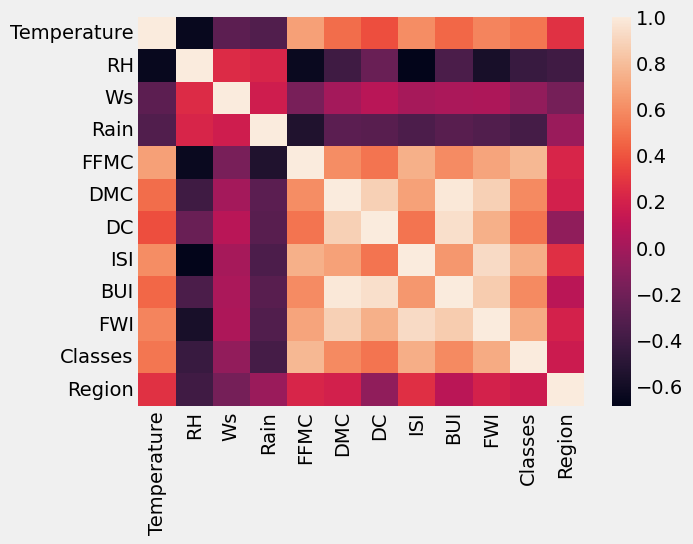

In [28]:
sns.heatmap(df.corr())

<Axes: ylabel='FWI'>

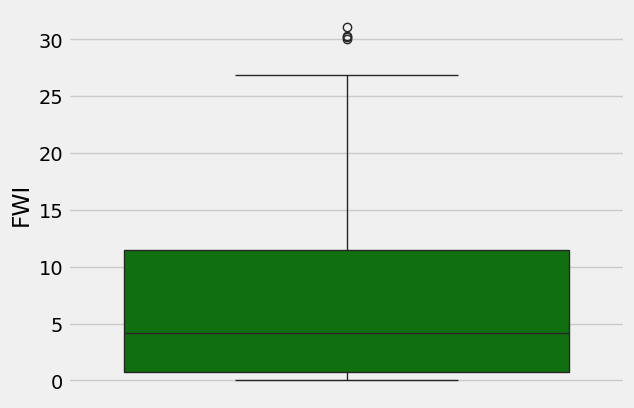

In [29]:
sns.boxplot(df["FWI"],color="green")

In [30]:
dc=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

dc["Classes"]=np.where(dc["Classes"].str.contains("not fire"),0,1)

In [31]:
dc.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [32]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

Text(0.5, 1.0, 'Monthly Fire Analysis of Sidi-Bel Regions')

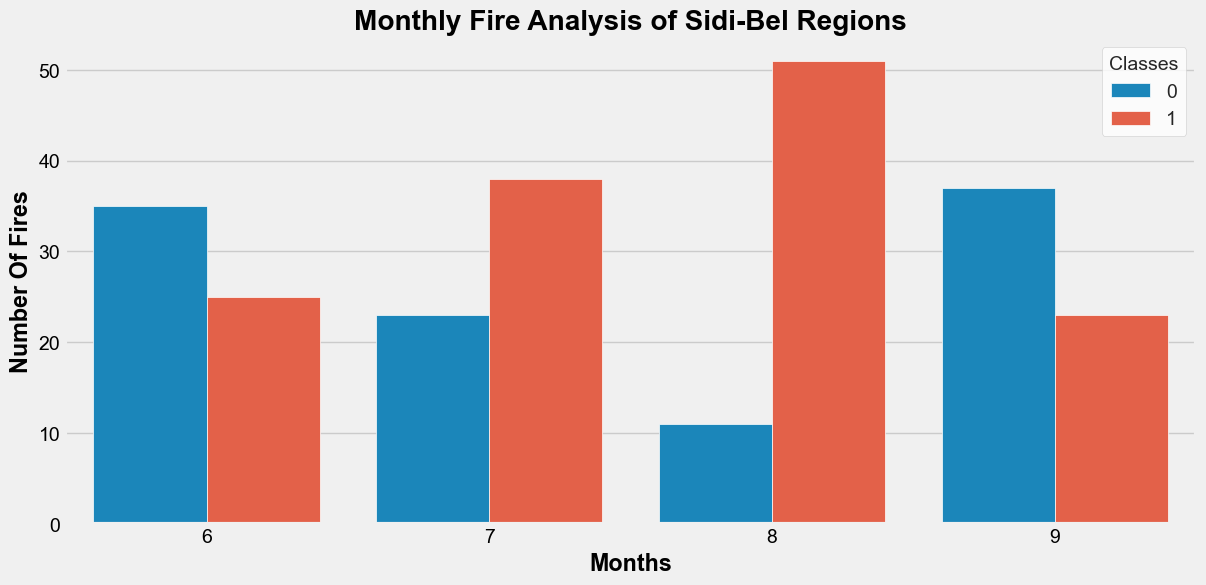

In [33]:
dftemp=df.loc[df["Region"]==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x="month",hue='Classes',data=dc)
plt.ylabel("Number Of Fires",weight='bold')
plt.xlabel("Months",weight='bold')
plt.title("Monthly Fire Analysis of Sidi-Bel Regions",weight='bold')



Text(0.5, 1.0, 'Monthly Fire Analysis of Brjaia Regions')

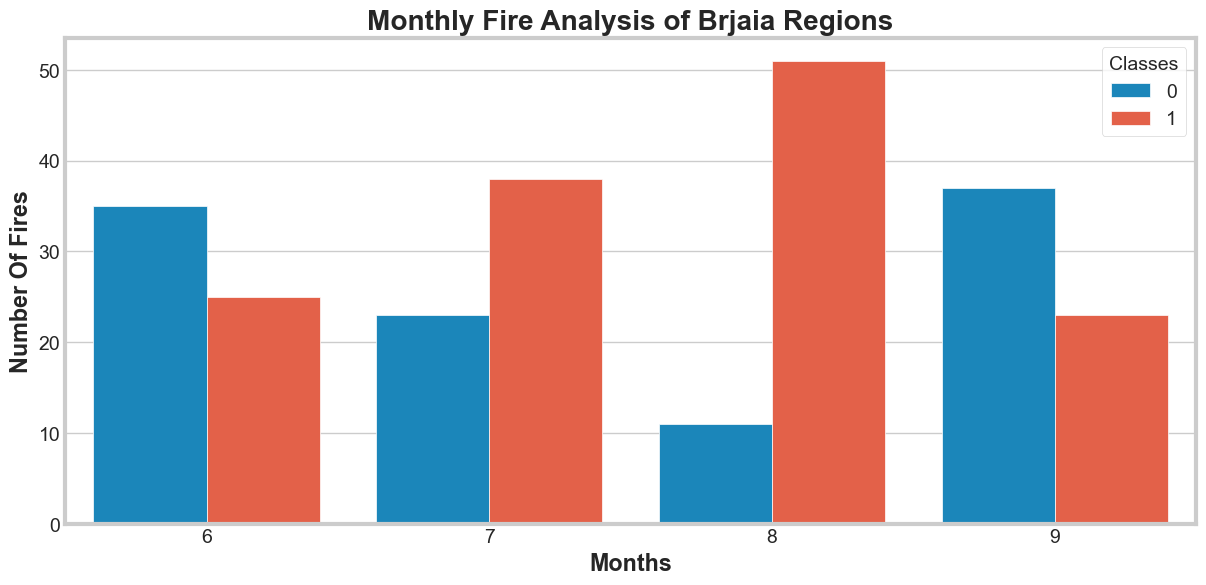

In [34]:
dftemp=df.loc[df["Region"]==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x="month",hue='Classes',data=dc)
plt.ylabel("Number Of Fires",weight='bold')
plt.xlabel("Months",weight='bold')
plt.title("Monthly Fire Analysis of Brjaia Regions",weight='bold')



# Regression Part  

In [35]:
#Independent Variable and Dependent Variable
X=df.drop('FWI',axis=1)
y=df['FWI']

In [36]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [37]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [38]:
from sklearn.model_selection import  train_test_split

In [39]:
X_train,X_test,y_train,y_test=t=train_test_split(X,y,test_size=0.33,random_state=42)

In [40]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((162, 11), (162,), (81, 11), (81,))

In [41]:
corr=X_train.corr()

<Axes: >

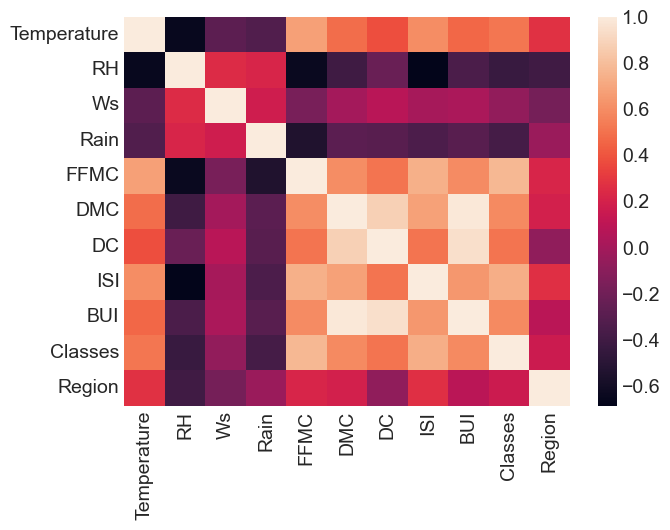

In [42]:
sns.heatmap(X.corr())

In [43]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [44]:
corr_freature=correlation(X_train,0.85)

In [45]:
corr_freature

{'BUI', 'DC'}

In [46]:
#DROPPING FEATURES WHEN CORRELATION IS MORE THAN 0.85
X_train.drop(corr_freature,axis=1,inplace=True)
X_test.drop(corr_freature,axis=1,inplace=True)

# Feature Scaling And Standardization 

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform (X_train)
X_test_scaled=scaler.transform(X_test)


In [48]:
X_train_scaled

array([[-1.12656349,  1.2199876 , -0.22762867, ..., -0.11433646,
         0.90566259,  0.9877296 ],
       [ 0.52256258,  0.1473255 , -0.98795537, ...,  0.09352209,
         0.90566259, -1.01242284],
       [ 0.24770824,  0.34844965, -0.22762867, ...,  0.09352209,
         0.90566259,  0.9877296 ],
       ...,
       [-1.95112653,  0.88478069,  0.53269803, ..., -1.06124763,
        -1.10416397, -1.01242284],
       [ 0.52256258, -0.25492278,  0.15253468, ...,  0.60162077,
         0.90566259,  0.9877296 ],
       [-0.5768548 ,  0.95182207,  2.05335143, ..., -0.85338908,
        -1.10416397, -1.01242284]])

In [49]:
X_test_scaled

array([[-3.02000454e-01,  8.02841227e-02, -2.27628673e-01,
        -3.84476576e-01,  6.43451873e-01, -7.48542807e-02,
         2.08999063e-01,  9.05662586e-01, -1.01242284e+00],
       [ 2.47708237e-01, -5.90129685e-01, -9.87955373e-01,
        -3.84476576e-01,  7.49493788e-01, -4.04459160e-01,
         3.70666824e-01,  9.05662586e-01, -1.01242284e+00],
       [-1.12656349e+00, -3.21964162e-01,  9.12861378e-01,
         6.02042154e-01, -9.82524172e-01, -9.18029554e-01,
        -8.30293687e-01, -1.10416397e+00,  9.87729597e-01],
       [ 5.22562583e-01, -3.21964162e-01, -9.87955373e-01,
        -2.94793055e-01,  1.34450676e-01,  2.70081058e-01,
        -6.22435137e-01, -1.10416397e+00,  9.87729597e-01],
       [-5.76854799e-01,  1.47325503e-01, -6.07792023e-01,
        -3.84476576e-01,  5.51548879e-01,  6.31198549e-02,
        -6.81456700e-02,  9.05662586e-01,  9.87729597e-01],
       [ 1.89683431e+00,  8.02841227e-02, -2.50860877e+00,
         1.53624550e-01, -2.68508604e-01, -2.664850

# Box Plots to Understand the Effect of     Standard Scaler  

Text(0.5, 1.0, 'X_train after Scaling ')

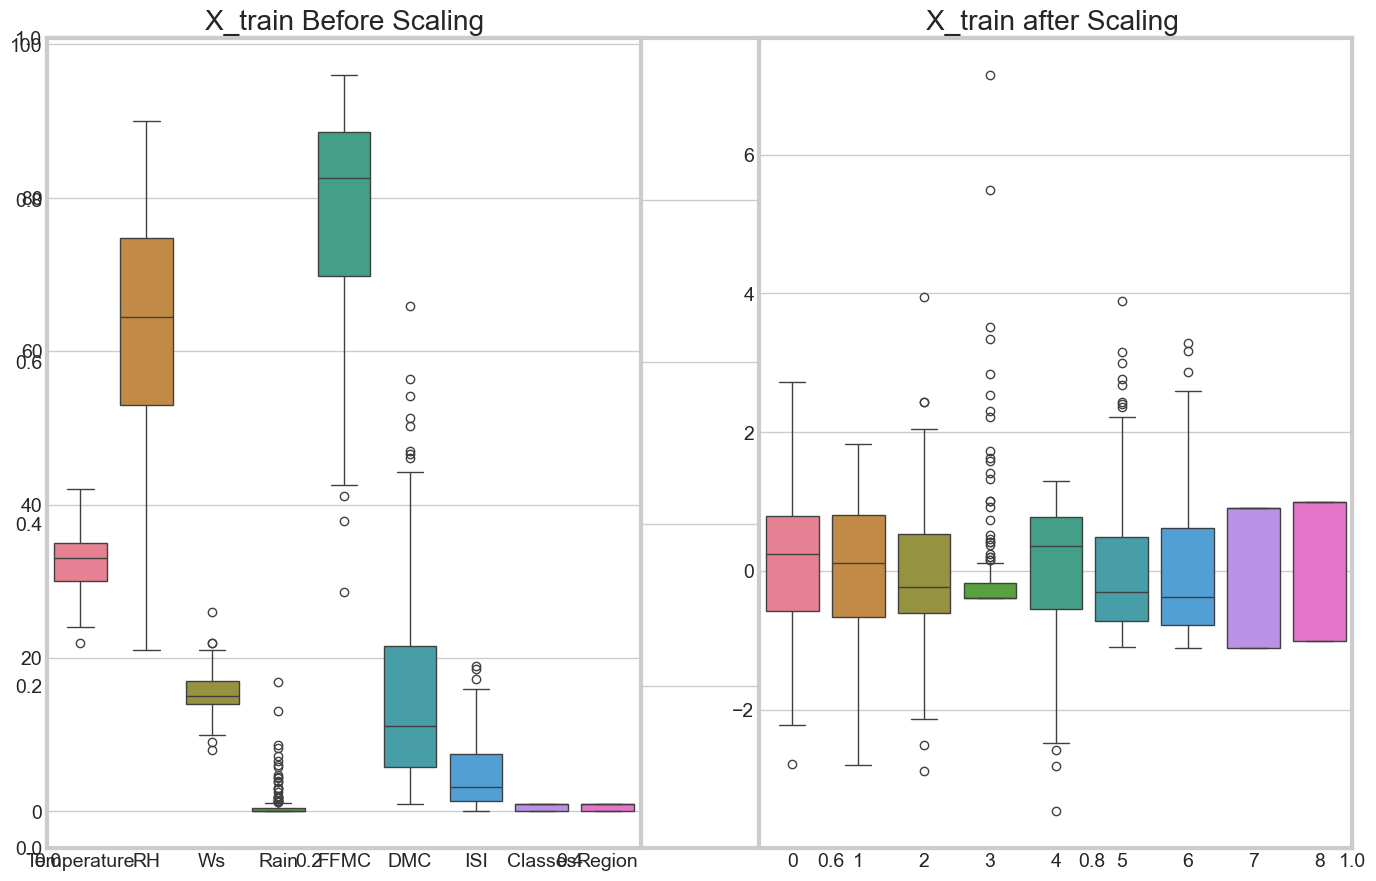

In [50]:
plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after Scaling ")

0.5767877823415978
0.9845563190792226


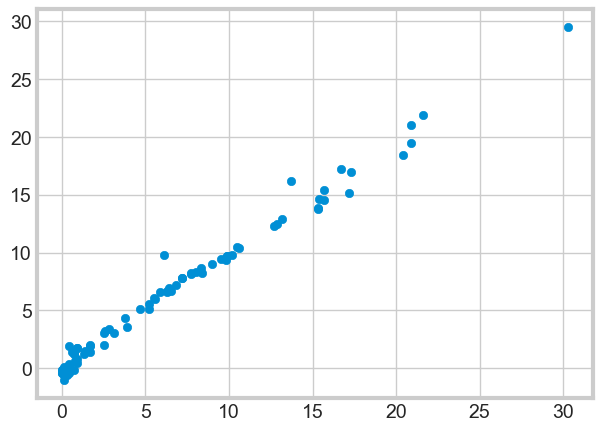

In [51]:
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred=lin_reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

## Lasso Regression 

1.1053469612945108
0.9514102148198662


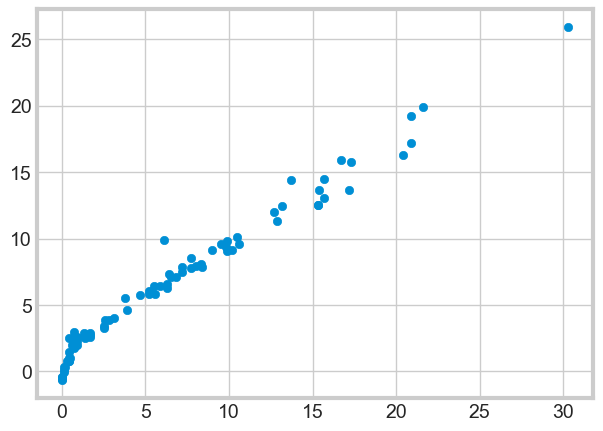

In [52]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lass=Lasso()
lass.fit(X_train_scaled,y_train)
y_pred=lass.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

## Cross Validation Lasso
 

In [53]:
from sklearn.linear_model import LassoCV
lasscv=LassoCV(cv=5)
lasscv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [54]:
lasscv.alpha_

0.03318346689607894

In [55]:
lasscv.alphas_

array([7.14916122, 6.66733168, 6.21797584, 5.79890508, 5.40807829,
       5.04359191, 4.7036707 , 4.38665903, 4.0910129 , 3.81529232,
       3.55815439, 3.31834669, 3.09470123, 2.88612872, 2.69161331,
       2.51020758, 2.34102799, 2.18325054, 2.03610676, 1.89887998,
       1.77090182, 1.65154897, 1.54024009, 1.43643307, 1.33962229,
       1.24933623, 1.16513515, 1.08660894, 1.01337513, 0.94507704,
       0.88138201, 0.82197981, 0.76658112, 0.71491612, 0.66673317,
       0.62179758, 0.57989051, 0.54080783, 0.50435919, 0.47036707,
       0.4386659 , 0.40910129, 0.38152923, 0.35581544, 0.33183467,
       0.30947012, 0.28861287, 0.26916133, 0.25102076, 0.2341028 ,
       0.21832505, 0.20361068, 0.189888  , 0.17709018, 0.1651549 ,
       0.15402401, 0.14364331, 0.13396223, 0.12493362, 0.11651351,
       0.10866089, 0.10133751, 0.0945077 , 0.0881382 , 0.08219798,
       0.07665811, 0.07149161, 0.06667332, 0.06217976, 0.05798905,
       0.05408078, 0.05043592, 0.04703671, 0.04386659, 0.04091

0.6041813665539068
0.983629786213086


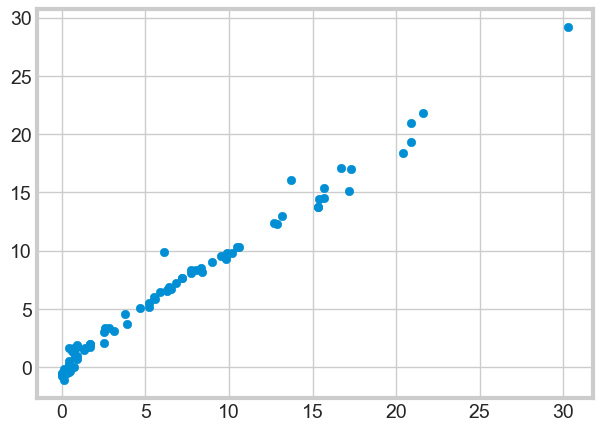

In [56]:
y_pred=lasscv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)


## Ridge Regression 


0.5953582907340879
0.9839564989246833


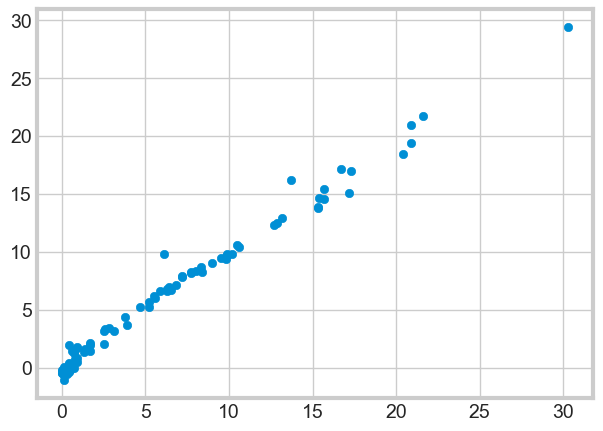

In [57]:
from sklearn.linear_model import Ridge 
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

# Ridge Cross Validation 

0.5953582907340879
0.9839564989246833


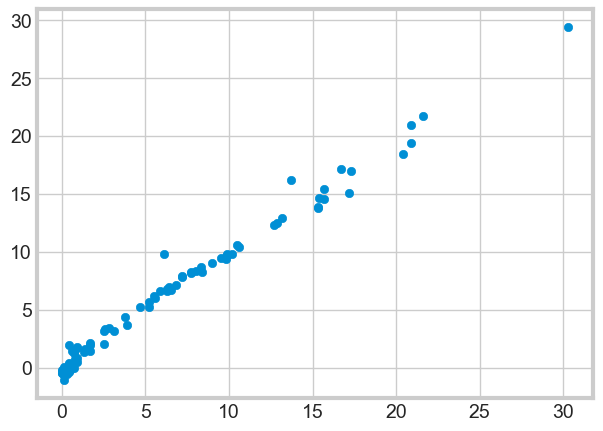

In [58]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
scores=r2_score(y_test,y_pred)
print(mae)
print(scores)

In [59]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

# ElasticNet Regression


1.834545337587552
0.8825431896054334


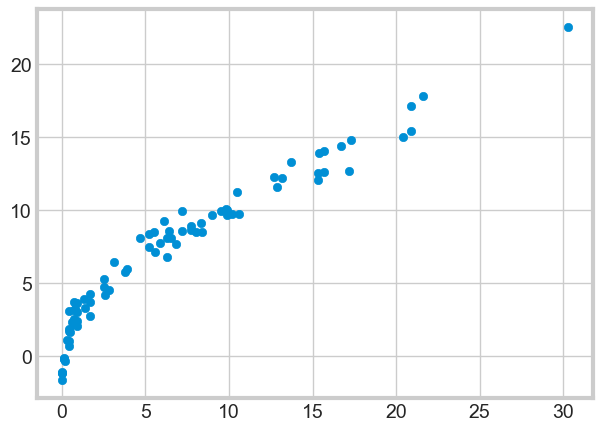

In [60]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

0.6264581775240788
0.9829634557249401


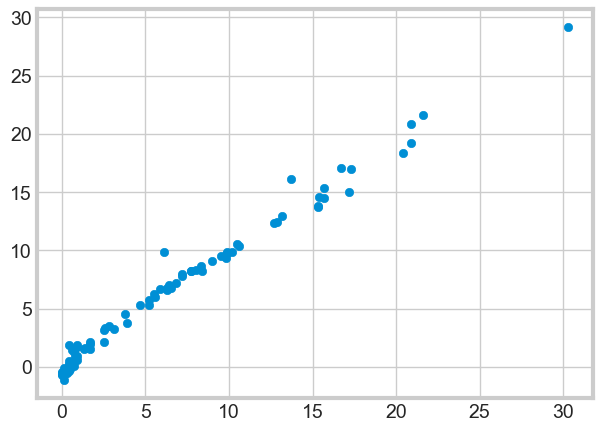

In [61]:
from sklearn.linear_model import ElasticNetCV
elasticv=ElasticNetCV(cv=5)
elasticv.fit(X_train_scaled,y_train)
y_pred=elasticv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)

In [62]:
elasticv.alphas_

array([14.29832244, 13.33466337, 12.43595168, 11.59781016, 10.81615657,
       10.08718382,  9.40734139,  8.77331807,  8.18202579,  7.63058464,
        7.11630877,  6.63669338,  6.18940246,  5.77225745,  5.38322661,
        5.02041516,  4.68205598,  4.36650108,  4.07221352,  3.79775996,
        3.54180365,  3.30309793,  3.08048019,  2.87286613,  2.67924457,
        2.49867245,  2.33027029,  2.17321787,  2.02675026,  1.89015408,
        1.76276402,  1.64395963,  1.53316225,  1.42983224,  1.33346634,
        1.24359517,  1.15978102,  1.08161566,  1.00871838,  0.94073414,
        0.87733181,  0.81820258,  0.76305846,  0.71163088,  0.66366934,
        0.61894025,  0.57722574,  0.53832266,  0.50204152,  0.4682056 ,
        0.43665011,  0.40722135,  0.379776  ,  0.35418036,  0.33030979,
        0.30804802,  0.28728661,  0.26792446,  0.24986725,  0.23302703,
        0.21732179,  0.20267503,  0.18901541,  0.1762764 ,  0.16439596,
        0.15331622,  0.14298322,  0.13334663,  0.12435952,  0.11

# Pickling 

In [63]:
import pickle
pickle.dump(ridge,open("ridge.pkl",'wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))

In [64]:
md=pickle.load(open("ridge.pkl",'rb'))

In [65]:
md

Ridge()

In [66]:
md.predict(X_test_scaled)

array([ 8.24764320e+00,  7.80784835e+00, -2.01740728e-01,  4.41362967e+00,
        6.72777529e+00,  1.37480469e+00,  2.06876283e+00,  7.94649751e+00,
        1.71323726e+00,  3.45947333e+00,  4.48808876e-01,  9.79410732e+00,
        9.36865072e+00,  1.69795177e+01,  1.84146049e+01,  1.36192309e+00,
        1.94667138e+00, -2.57010203e-01,  7.16568703e+00,  3.17789585e+00,
        1.41378335e+00,  1.51815731e-01,  6.66021233e+00,  3.21273325e-01,
        2.08999110e+01,  5.23867292e+00,  5.99756210e+00,  9.81172851e+00,
       -2.38154537e-01,  9.77144548e+00,  6.60531202e+00, -3.87772492e-01,
        1.03915192e+01,  1.45369281e+01,  1.58937549e+00,  5.00802120e-01,
        2.09435375e+00,  6.22454475e+00, -6.47630734e-01, -4.75661874e-01,
        6.77558183e+00,  1.91797796e+00,  8.67335158e+00, -4.94752328e-01,
        1.53942308e+01,  8.32573577e+00,  8.18862662e+00,  1.42747903e+00,
        1.29188127e+01,  1.25605731e+00,  2.93844502e+01,  5.68616075e+00,
        1.71692373e+01,  